In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [101]:
data = pd.read_csv('Downloads/diabetes.csv')

In [102]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [120]:
data.shape

(768, 9)

In [103]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


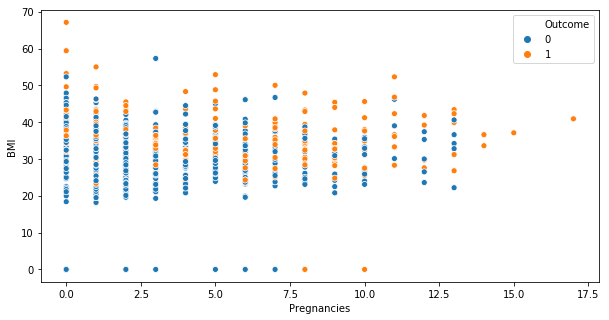

In [104]:
f= plt.figure(figsize=(10,5))
sns.scatterplot(data['Pregnancies'],data['BMI'],data['Outcome'])

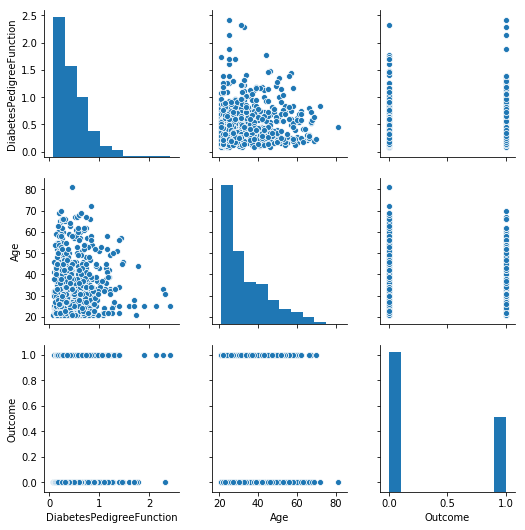

In [105]:
sns.pairplot(data[['DiabetesPedigreeFunction','Age','Outcome']])

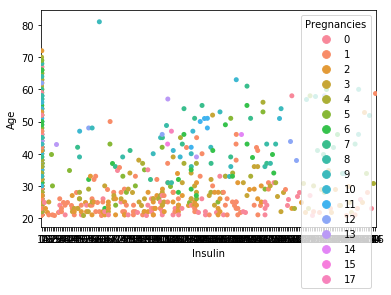

In [118]:
sns.stripplot(data['Insulin'],data['Age'],data['Pregnancies'])

C:\Users\15-AU003TX\Ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


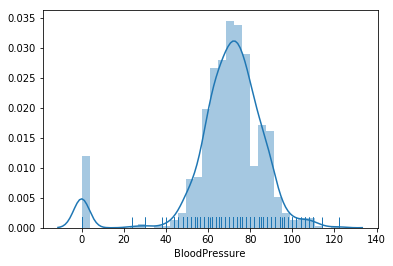

In [106]:
sns.distplot(data['BloodPressure'],kde=True, rug=True)

C:\Users\15-AU003TX\Ananconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


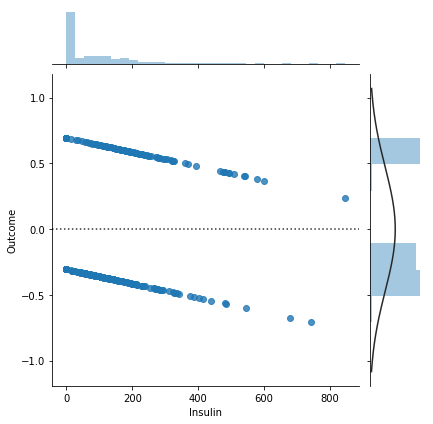

In [107]:
sns.jointplot(data['Insulin'],data['Outcome'],kind="resid")

In [108]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2, random_state = 4)


In [110]:
sc = StandardScaler()

In [111]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [112]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [113]:
pred_gaussian = classifier.predict(X_test)

In [114]:
print(classification_report(y_test , pred_gaussian))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       102
          1       1.00      1.00      1.00        52

avg / total       1.00      1.00      1.00       154



In [115]:
confusion = print(confusion_matrix(y_test ,pred_gaussian))

[[102   0]
 [  0  52]]


In [119]:
print(accuracy_score(pred_gaussian , y_test)*100)

100.0


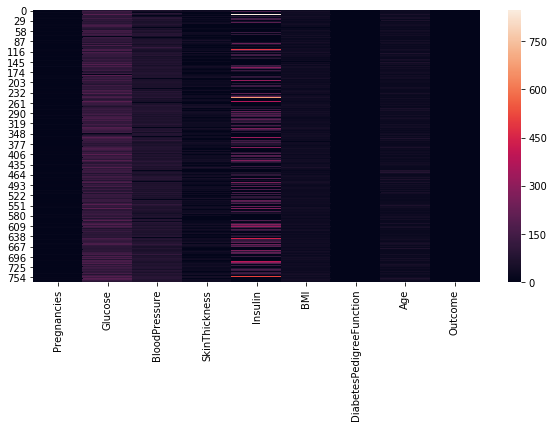

In [117]:
f = plt.figure(figsize=(10,5))
sns.heatmap(data)